In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import dct

In [19]:
img =cv2.imread('Image/1image.png',0)

In [20]:
# DFT
dft_result=np.fft.fft2(img)
dft_shift=np.fft.fftshift(dft_result)
dft_magnitude=20*np.log(np.abs(dft_shift)+1)

In [21]:
# DCT
dct_result=dct(dct(img.T,norm='ortho').T,norm='ortho')
dct_magnitude=np.log(np.abs(dct_result)+1)

In [22]:
# DWT
coeffs2 = pywt.dwt2(img, 'haar')
# LL, (LH, HL, HH) = coeffs2
cA, (cH, cV, cD) = coeffs2

# Reconstruct image
reconstructed = pywt.idwt2((cA, (cH, cV, cD)), 'haar')

# combine into one spectrogram
dwt_magnitude = np.vstack((
    np.hstack((cA, cH)),
    np.hstack((cV, cD))
))

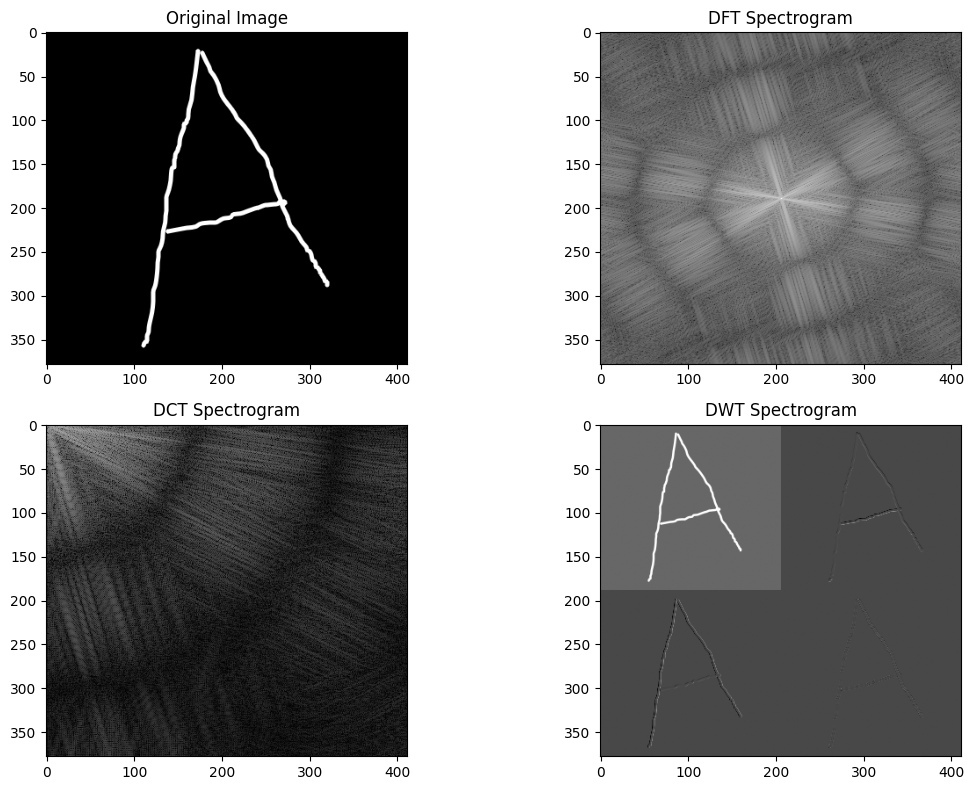

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(dft_magnitude, cmap='gray')
plt.title("DFT Spectrogram")

plt.subplot(2,2,3)
plt.imshow(dct_magnitude, cmap='gray')
plt.title("DCT Spectrogram")

plt.subplot(2,2,4)
plt.imshow(dwt_magnitude, cmap='gray')
plt.title("DWT Spectrogram")

plt.tight_layout()
plt.show()
